In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os
os.chdir("/kaggle/working")


In [2]:

df=pd.read_csv("/kaggle/input/dataset-for-neural-network-competition/train.csv")
df.dropna(how='all',axis=1,inplace=True)

df=df[df["Class Identification"]!="Abnormal"]
df=df[df["Class Identification"]!="Normal"]

df["Class Identification"]=(df["Class Identification"]=="Positive").astype(int)

df=df.dropna()
print(df)

      Age  HB (gm/dl)  ESR(mm)  WBC(TC) (/cumm)  Neutrophils (%)  \
0    14.0       11.40     28.0           4200.0               57   
1    26.0       12.20     43.0           4700.0               77   
2    42.0       14.90    103.0          19800.0               82   
3    35.0       13.90     12.0           9700.0               88   
4     8.0       10.00     28.0          10600.0               46   
..    ...         ...      ...              ...              ...   
494  39.0       10.47     23.0          17666.0               83   
495  32.0       11.95     52.0          14624.0               68   
496  36.0       14.31     35.0          14340.0               81   
498  58.0       12.93     82.0           5469.0               85   
499  10.0       11.49     88.0          15324.0               57   

     lymphocytes (%)  Monocytes (%)  Eosinophils (%)  Cir Eosinophils (/cumm)  \
0                 36            5.0              2.0                     84.0   
1                 19 

In [3]:
def prepdat(df,oversample):
    x=df[df.columns[:-1]]
    y=df[df.columns[-1]]
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    print(x)
    return x,y

def prepdattest(df):
    y=df
    scaler=StandardScaler()
    y=scaler.fit_transform(y)
    print(y)
    return y

In [4]:
X,y=prepdat(df,oversample=True)

[[-1.03845435 -0.35367474 -0.3054759  ... -0.7287147   0.82421594
  -0.23236908]
 [-0.37933576  0.05756005  0.25667081 ...  0.13532703 -0.27079267
  -0.0585599 ]
 [ 0.49948902  1.44547745  2.50525767 ... -0.35167831  0.0942102
  -0.09945618]
 ...
 [-0.65396851 -0.83687562  2.09301674 ...  0.1884813   0.54438041
  -0.20169688]
 [ 0.60934211  0.62814831  1.38096424 ...  0.57885535  0.82421594
  -0.04833583]
 [-1.42294019  0.10896439 -0.79266972 ... -1.35710868  0.70254832
  -0.28348943]]


neural net

In [5]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  ax1.legend()

  plt.ylim([0.0,1.0])
  plt.show()

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5131 - loss: 0.7617 - val_accuracy: 0.4789 - val_loss: 0.5995
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7554 - loss: 0.5810 - val_accuracy: 0.5423 - val_loss: 0.6115
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5040 - val_accuracy: 0.5211 - val_loss: 0.6850
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4368 - val_accuracy: 0.5845 - val_loss: 0.6598
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8019 - loss: 0.4088 - val_accuracy: 0.6901 - val_loss: 0.5716
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.3298 - val_accuracy: 0.7042 - val_loss: 0.5198
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3229 - val_accuracy: 0.7183 - val_loss: 0.4915
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8549 - loss: 0.3121 - val_accuracy: 0.6831 - 

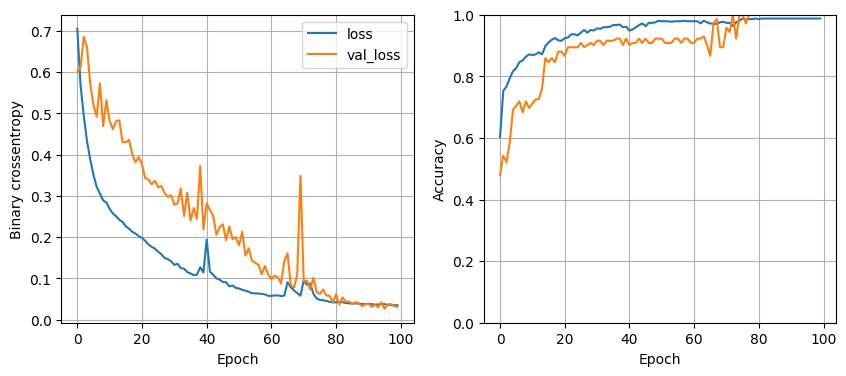

learning rate: 
0.007


In [15]:
def trainmodel(lr):
    nnmodel=tf.keras.Sequential(
        [
            tf.keras.layers.Dense(8, activation='relu',input_shape=(19,)),
            tf.keras.layers.Dense(8, activation='relu'),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ]
    )
    nnmodel.compile(optimizer=tf.keras.optimizers.Adam(0.007),loss='binary_crossentropy',metrics=['accuracy'])

    history=nnmodel.fit(X,y,epochs=100,batch_size=32,validation_split=0.2,verbose=1)
    plot_history(history)
    print("learning rate: ")
    print(lr)
    return nnmodel
    
model=trainmodel(0.007)

In [7]:
dftest=pd.read_csv("/kaggle/input/dataset-for-neural-network-competition/test.csv")

y_test=prepdattest(dftest)
y_pred=model.predict(y_test)
y_pred=np.reshape(y_pred,(len(y_pred)))
finaldf=pd.DataFrame({'ID':range(1,len(y_pred)+1,1),'Prediction':y_pred})
finaldf=finaldf.fillna(0.6)

finaldf.to_csv("solution.csv",index=False)

[[ 1.52543325 -0.21690508 -0.10394618 ...  0.27075979 -0.98978454
  -0.05978266]
 [ 1.25932599  0.43321914  0.82549959 ...  1.87851024 -0.50151873
   1.74318634]
 [-0.92275353 -0.21690508  0.15629864 ...  1.21348619 -0.36201422
   1.17382771]
 ...
 [-0.12443175 -0.51241609 -0.02959052 ... -0.66465865  0.54476513
  -0.53424818]
 [-0.76308917  0.66962795 -0.88468062 ...  0.21229614 -0.08300519
   0.22489666]
 [-0.33731756  1.43795657 -0.92185845 ... -0.47465178  0.61451739
   0.79425529]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [16]:
import joblib
joblib.dump(model,"/kaggle/working/workingmodel.joblib")

['/kaggle/working/workingmodel.joblib']